# U.S. Medical Insurance Costs

## Project Scope:


      This project analyzes a CSV dataset containing data
    for each member of the sample population in the following format:
    
            age,sex,bmi,children,smoker,region,charges
      
      We will compare how each variable affects the insurance cost (charges) of the member, 
    in order to rank each variable by least-to-greatest effect on cost.
    
      Once that is determined, we can determine which course of action 
    a member can take to lower their insurance cost based on their current data.
    For example: say smoking is determined to have the greatest effect on insurance cost;
    a non-smoking member wants to lower their insurance cost,
    we should give them the best option that applies to their data.
    
    To do this, we will...
        
        - Collect member data for each variable from the dataset.
        
        - Compare how much a change in each variable affects the expected cost; this will
        require different treatment for categorical and numerical data.
        
        - Order from least-to_greatest all variables by the change in insurance cost for each variables value.
        Numerical variables may be ranked by the magnitude of the slope of their line of best fit,
        while categorical variables may be ranked by the difference in average costs.
        
        - Write a function for determining which factor likely has the greatest effect on the the
        insurance cost for a given member based on their data.
***

## Collecting Data:

  ### Plan:
  
      We will use the csv library in order to parse the dataset, and store the
     member data for each variable in a structure that maps variable value to insurance cost.
     We will then store each structure in its corresponding list, to be analyzed individually.

In [85]:
import csv, math
import matplotlib.pyplot as plot

# These map values to insurance costs:
value_to_cost = {
    "age"      : [],
    "sex"      : [],
    "bmi"      : [],
    "children" : [],
    "smoker"   : [],
    "region"   : []
}


with open('./insurance.csv', newline='') as insurance_data:
    csv_reader = csv.DictReader(insurance_data)
    for row in csv_reader:
        for key, value in row.items():
            if key != 'charges':
                value_to_cost[key].append( (value, row['charges']) )


entries_displayed = 10
for var, data in value_to_cost.items():
    print(var.title())
    for i in range(entries_displayed):
        print(f'\t{data[i]}')
    print(f"\tPlus {len(data) - entries_displayed} items...\n" + '-'*100)


Age
	('19', '16884.924')
	('18', '1725.5523')
	('28', '4449.462')
	('33', '21984.47061')
	('32', '3866.8552')
	('31', '3756.6216')
	('46', '8240.5896')
	('37', '7281.5056')
	('37', '6406.4107')
	('60', '28923.13692')
	Plus 1328 items...
----------------------------------------------------------------------------------------------------
Sex
	('female', '16884.924')
	('male', '1725.5523')
	('male', '4449.462')
	('male', '21984.47061')
	('male', '3866.8552')
	('female', '3756.6216')
	('female', '8240.5896')
	('female', '7281.5056')
	('male', '6406.4107')
	('female', '28923.13692')
	Plus 1328 items...
----------------------------------------------------------------------------------------------------
Bmi
	('27.9', '16884.924')
	('33.77', '1725.5523')
	('33', '4449.462')
	('22.705', '21984.47061')
	('28.88', '3866.8552')
	('25.74', '3756.6216')
	('33.44', '8240.5896')
	('27.74', '7281.5056')
	('29.83', '6406.4107')
	('25.84', '28923.13692')
	Plus 1328 items...
------------------------------

#### Follow-up:
    
      Now we have our data in the form of points which
    map values to insurance costs, contained in lists correspond to the
    variable type we want to analyze individually.
    
      We can now begin to analyze our variables effect on costs.
    
***

## Analysis:

     We will examine each variable in the order they appear within the dataset.
    The goal will be to calculate the average change in cost for changes in numerical variables;
    categorical variables will require special consideration when determining how to calculate this
    value.

In [86]:
# Defining some helper functions:

def line_y(m, b, x):
    return m*float(x) + b

def get_error(m, b, point):
    point_x, point_y = point
    return abs(line_y(m, b, float(point_x)) - float(point_y))

def get_total_error(m, b, points):
    total_error = 0
    for point in points:
        total_error += get_error(m, b, point)
    return total_error

def line_of_best_fit(points, m_min=-10, m_max=10, m_step=0.1, b_step=0.1):
    least_error = float(1000000000000000000)
    best_m, best_b = 0, 0
    
    b_min, b_max = least_error, 0
    for _, y in points:
        y = float(y)
        if y > b_max:
            b_max = y
        if y < b_min:
            b_min = y
    print(f"Least possible b-value: {b_min}\nGreatest possible b-value: {b_max}\n")
    
    for m in [0.1*n for n in range(int(m_min*10), int(m_max*10), int(m_step*10))]:
        for b in [0.1*n for n in range(int(b_min*10), int(b_max*10), int(b_step*10))]:
            line_error = get_total_error(m, b, points)
            
            if line_error < least_error:
                best_m, best_b, least_error = m, b, line_error
    print('-'*115, f'\nLine of best fit: y = {best_m}x + {best_b} ---> Error: {least_error}')
    return (best_m, best_b, least_error)

def get_median(values):
    values.sort()
    if len(values) % 2 == 0:
        return (values[int(len(values)/2) - 1] + values[int(len(values)/2)]) / 2
    else:
        return values[math.floor(len(values) / 2)]

***

### Age:
      
      Since age is a numerical variable, we can simply map sorted ages to their corresponding cost,
      and determine a line of best fit for this mapping. The slope of this line will determine the average
      change in insurance cost for a change in age.
      
      First, lets visualize our data as a scatter-plot with Matplotlib:

(15.0, 80.0)

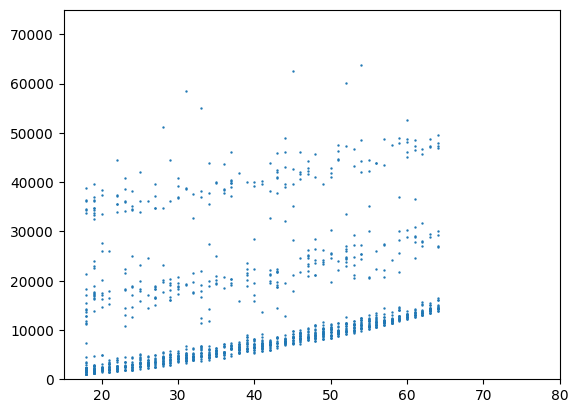

In [87]:
x, y = [], []
for age, cost in value_to_cost['age']:
    x.append(int(age))
    y.append(float(cost))

fig, ax = plot.subplots()
ax.scatter(x,y,s=0.5)
ax.set_ylim(0, 75000)
ax.set_xlim(15, 80)

  Notice how the insurance costs seems to generally increase with age, at a roughly linear rate for our dateset. 
  
  It's also worth noting the three separate "bands" of insurance cost data, and the fact that our dataset only contains data for people with ages between 18 and 65. The next step will be to calculate a line of best fit, and plot it along with the data in order to investigate how these factors will affect our plan for ranking this variables.

In [ ]:
# Calculating and analyzing line of best fit:
m, b, error = line_of_best_fit(value_to_cost['age'], 0, 10000, 50, 100)

Least possible b-value: 1121.8739
Greatest possible b-value: 63770.42801



  This line of best fit is the result of trail-and-error with the line_of_best_fit functions arguments. 
This included setting the minimum and maximum possible slopes to 0, and 10000, 
and setting the steps the function increments the m and b values in the linear equation y = mx + b,
in order to better suit the dataset.

  The plotted line in the figure below appear to roughly correlate with the data in the lowest band (a more suitable model would likely be at least a quadratic function). The figures in the higher bands seem to correlate more with the line of best fit; however this is from personal observation and not direct calculation. 
  
  Nonetheless, this model will serve the purposes of this project, as we only care about the rate of change in insurance cost for each variable as a rough estimate in order to compare its effect with other variables'.

In [ ]:
z = [int(n) for n,_ in value_to_cost['age']]
w = [m*n + b for n in z]
fig, ax = plot.subplots()
ax.scatter(x, y, s=0.5)
ax.scatter(z, w, s=0.5)
print(f"Line of best fit: y = {m}x + {b}")

***

### Sex:
    
      As a binary categorical variable in our dataset, 
    each variable can be averaged individually, then compared. <-- edit plz

In [ ]:
frequency_males, males_cost = 0, 0.0
frequency_females, females_cost = 0, 0.0
for sex, cost in value_to_cost['sex']:
    if sex == 'male':
        frequency_males += 1
        males_cost += float(cost)
    elif sex == 'female':
        frequency_females += 1
        females_cost += float(cost)
    else:
        print(f'Unreadable data: {sex}, {cost}')
print(
    f"Total males: {frequency_males}, total cost: ${males_cost}\n" +
    f"Total females: {frequency_females}, total cost: ${females_cost}"
)

In [ ]:
# Ratio, proportion analysis for sex and cost:
ratio_mf = frequency_males / frequency_females
proportion_males = frequency_males / (frequency_males + frequency_females)

ratio_mf_cost = males_cost / females_cost
proportion_m_cost = males_cost / (males_cost + females_cost)

male_cost_mean = males_cost / frequency_males
female_cost_mean = females_cost / frequency_females

m_floats = []
f_floats = []
for sex,cost in value_to_cost['sex']:
    if sex == 'male':
        m_floats.append( float(cost) )
    elif sex == 'female':
        f_floats.append( float(cost) )
        
male_cost_median = get_median(m_floats)
female_cost_median = get_median(f_floats)

diff_mean_cost = male_cost_mean - female_cost_mean
diff_median_cost = male_cost_median - female_cost_median

print(
f'''
Ratio of males to females: {ratio_mf}
Percentage of males to total population: {round(proportion_males * 100, 2)}%

Ratio of insurance cost of males to females: {ratio_mf_cost}
Percentage of male insurance cost to total cost in dataset: {round(proportion_m_cost * 100, 2)}%

Mean Male Cost: ${round(male_cost_mean, 2)}
Median Male Cost: ${round(male_cost_median, 2)}

Mean Female Cost: ${round(female_cost_mean, 2)}
Median Female Cost: ${round(female_cost_median, 2)}

Difference in mean cost (male - female): ${round(diff_mean_cost, 2)}
Difference in median cost (male - female): ${round(diff_median_cost, 2)}
'''
)

#### Follow up:
      According to this dataset, the mean costs of males and females respectively are: $13956.75 and $12569.58.
    We can see according to the mean, that males pay $1387.17 more in insurance costs.
    
      According to the median, males pay $43.35 less in insurance costs,
    which may suggest that there are outliers influencing the mean.
    
      This should also be noted when considering that 
    males consist of 50.52% of the sample population,
    but pay 53.14% of the total insurance in the dataset.

***

### BMI

      We will plot the values using Pyplot in a similar fashion to how we treated the age variable, then create
    a line of best fit for the resulting scatterplot.

In [ ]:
x, y = [], []
for bmi, cost in value_to_cost['bmi']:
    x.append(float(bmi))
    y.append(float(cost))

fig, ax = plot.subplots()
ax.scatter(x,y,s=0.5)
ax.set_ylim(0, 75000)
ax.set_xlim(10, 60)

In [ ]:
m, b, error = line_of_best_fit(value_to_cost['bmi'], 0, 10000, 50, 100)

z = [float(n) for n,_ in value_to_cost['bmi']]
w = [m*n + b for n in z]
fig, ax = plot.subplots()
ax.scatter(x, y, s=0.5)
ax.plot(z, w)

In [ ]:
total_bmi = 0.0
total_cost = 0.0
len_data = len(value_to_cost['bmi'])
bmi_floats, cost_floats = [], []

for bmi, cost in value_to_cost['bmi']:
    total_bmi += float(bmi)
    total_cost += float(cost)
    bmi_floats.append(float(bmi))
    cost_floats.append(float(cost))

mean_bmi = round(total_bmi / len_data, 2)
mean_cost = round(total_cost / len_data, 2)

median_bmi = get_median(bmi_floats)
median_cost = get_median(cost_floats)

print(
f'''
Mean BMI: {mean_bmi}
Mean cost: {mean_cost}
Median BMI: {median_bmi}
Median cost: {median_cost}
'''
)

#### Follow up:

      It seems like BMI has less of an effect on insurance cost according to our line of best fit;
    however, there is a notable jump in high insurance costs around the BMI = 30 mark.
    
      This is notable because the CDC defines obesity as any BMI above 30.0; it makes sense that higher
    insurance rates correlated with people who would qualify as obese according to this standard.
    
      Its harder to speculate on the people who seemed to pay
    insurance costs closer to the mean and median costs.
***
 
### Number of Children

In [ ]:
x, y = [], []
for num_children, cost in value_to_cost['children']:
    x.append(int(num_children))
    y.append(float(cost))

fig, ax = plot.subplots()
ax.scatter(x,y,s=0.5)
ax.set_ylim(0, 75000)
ax.set_xlim(-1, 7)

In [ ]:
m, b, error = line_of_best_fit(value_to_cost['children'], -25000, 0, 50, 100)

z = [int(n) for n,_ in value_to_cost['children']]
w = [m*n + b for n in z]
fig, ax = plot.subplots()
ax.scatter(x, y, s=0.5)
ax.plot(z, w)

#### Follow-up:
    
      It seems that there is a very slight decrease in cost per increase in number of children.
    Keeping in mind that the mean cost is $13270.42 and the median cost is $9382.033, it seems this
    data somewhat matches up with insurance costs being clustered in three bands as shown
    in the age variable analysis, which suggests another factor is having a greater effect on insurance costs,
    that is independant of age or number of children.
    
***

### Smoker Status


In [ ]:
smokers = 0
nonsmokers = 0
smokers_cost = 0.0
nonsmokers_cost = 0.0
for status, cost in value_to_cost['smoker']:
    if status == 'yes':
        smokers += 1
        smokers_cost += float(cost)
    elif status == 'no':
        nonsmokers += 1
        nonsmokers_cost += float(cost)
        
smokers_nonsmokers_ratio = smokers / nonsmokers
smokers_proportion = smokers / len_data

smokers_nonsmokers_cost_ratio = smokers_cost / nonsmokers_cost
smokers_cost_proportion = smokers_cost / total_cost

print(
f'''
Ratio of smokers to non-smokers: {smokers_nonsmokers_ratio}:1
Percentage of smokers in total population: {round(smokers_proportion * 100, 2)}%

Ratio of smokers cost to non-smokers cost: {smokers_nonsmokers_cost_ratio}:1
Percentage of smokers cost in total cost: {round(smokers_cost_proportion * 100, 2)}%
'''
)

In [ ]:
smoker_cost_mean = smokers_cost / smokers
nonsmoker_cost_mean = nonsmokers_cost / nonsmokers

sc_floats = [float(cost) for status,cost in value_to_cost['smoker'] if status == 'yes']
nsc_floats = [float(cost) for status,cost in value_to_cost['smoker'] if status == 'no']
smoker_cost_median = get_median(sc_floats)
nonsmoker_cost_median = get_median(nsc_floats)

diff_smoker_nonsmoker_mean = smoker_cost_mean - nonsmoker_cost_mean
diff_smoker_nonsmoker_median = smoker_cost_median - nonsmoker_cost_median

print(
f'''
Mean insurance cost for smokers: ${round(smoker_cost_mean, 2)}
Mean insurance cost for nonsmokers: ${round(nonsmoker_cost_mean, 2)}

Median insurance cost for smokers: ${round(smoker_cost_median, 2)}
Median insurance cost for nonsmokers: ${round(nonsmoker_cost_median, 2)}

Difference in mean insurance cost of smokers and nonsmokers: ${round(diff_smoker_nonsmoker_mean, 2)}
Difference in mean insurance cost of smokers and nonsmokers: ${round(diff_smoker_nonsmoker_median, 2)}
'''
)

#### Follow up:
    
      It's clear that smokers on average pay far more in insurance than nonsmokers;
    they make up about a fifth of the total population, but account for 
    almost half of the total insurance costs.
    
      Smokers on average pay $23615.96 more according to this dataset,
    with a median cost of $27110.94, while both measures of cost for nonsmokers are below $9000.
    
      This suggests that smoking has a significant factor on insurance cost.

***

### Region



In [ ]:
total_ne, total_se, total_sw, total_nw = 0, 0, 0, 0
total_cost_ne, total_cost_se, total_cost_sw, total_cost_nw = 0.0, 0.0, 0.0, 0.0
ne_floats, se_floats, sw_floats, nw_floats = [], [], [], []
for region, cost in value_to_cost['region']:
    match region:
        case 'northeast':
            total_ne += 1
            total_cost_ne += float(cost)
            ne_floats.append(float(cost))
        case 'southeast':
            total_se += 1
            total_cost_se += float(cost)
            se_floats.append(float(cost))
        case 'southwest':
            total_sw += 1
            total_cost_sw += float(cost)
            sw_floats.append(float(cost))
        case 'northwest':
            total_nw += 1
            total_cost_nw += float(cost)
            nw_floats.append(float(cost))
        case other:
            pass
        
mean_cost_ne = total_cost_ne / total_ne
mean_cost_se = total_cost_se / total_se
mean_cost_sw = total_cost_sw / total_sw
mean_cost_nw = total_cost_nw / total_nw
        
region_floats = [ne_floats, se_floats, sw_floats, nw_floats]
region_medians = []
for region in region_floats:
    region_medians.append(round(get_median(region), 2))
    
median_cost_ne, median_cost_se, median_cost_sw, median_cost_nw = region_medians

lowest_mean_cost = min(mean_cost_ne, mean_cost_se, mean_cost_sw, mean_cost_nw)
highest_mean_cost = max(mean_cost_ne, mean_cost_se, mean_cost_sw, mean_cost_nw)

lowest_median_cost = min(median_cost_ne, median_cost_se, median_cost_sw, median_cost_nw)
highest_median_cost = max(median_cost_ne, median_cost_se, median_cost_sw, median_cost_nw)

diff_mean_cost_ew = ((mean_cost_ne + mean_cost_se) - (mean_cost_nw + mean_cost_sw)) / 2
diff_median_cost_ew = ((median_cost_ne + median_cost_se) - (median_cost_nw + median_cost_sw)) / 2

print(
f'''
Total northeast population: {total_ne}
Percentage northeast to total population: {round((total_ne / len_data) * 100, 2)}%
Total insurance cost of northeast: ${round(total_cost_ne, 2)}
Mean insurance cost of northeast: ${round(mean_cost_ne, 2)}
Median insurance cost of northeast: ${median_cost_ne}

Total southeast population: {total_se}
Percentage southeast to total population: {round((total_se / len_data) * 100, 2)}%
Total insurance cost of southeast: ${round(total_cost_se, 2)}
Mean insurance cost of southeast: ${round(mean_cost_se,2)}
Median insurance cost of southeast: ${median_cost_se}

Total southwest population: {total_sw}
Percentage southwest to total population: {round((total_sw / len_data) * 100, 2)}%
Total insurance cost of southwest: ${round(total_cost_sw, 2)}
Mean insurance cost of southwest: ${round(mean_cost_sw, 2)}
Median insurance cost of southwest: ${median_cost_sw}

Total northwest population: {total_nw}
Percentage northwest to total population: {round((total_nw / len_data) * 100, 2)}%
Total insurance cost of northwest: ${round(total_cost_nw, 2)}
Mean insurance cost of northwest: ${round(mean_cost_nw, 2)}
Median insurance cost of northwest: ${median_cost_nw}

Lowest mean cost: ${round(lowest_mean_cost, 2)} (southwest)
Highest mean cost: ${round(highest_mean_cost, 2)} (southeast)

Lowest median cost: ${round(lowest_median_cost, 2)} (southwest)
Highest median cost: ${round(highest_median_cost, 2)} (northeast)

Difference in average mean cost for eastern and western regions (east - west): ${round(diff_mean_cost_ew, 2)}
Difference in average median cost for eastern and western regions (east - west): ${round(diff_median_cost_ew, 2)}
'''
)

#### Follow up:

      It seems that the western regions in our dataset pay similar mean insurance costs,
    with both between $12300 and $12500, and median costs lying between $8700 and $9000.
    
      This is generally lower than the eastern regions, with the southeast having the highest
    mean cost of $14735.41, and the northeast having the highest median cost of $10057.65.
    
      It follows that according to our dataset, living on the east side of the regions in our dataset
    is correlated with higher insurance rates. Taking the average of the mean and median costs 
    for the eastern and western regions respectively, we find that members in western regions in general 
    pay less in insurance than members in eastern regions.
    
***

## Ranking our Variables

